In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/tobi_helen/Timer.csv')

In [ ]:
dataset.head()

,Days,Departure Point (Felele /Adankolo),Bus Route (Felele Road/Crusher Road),Departure Time,Arrival Point(Felele/Adankolo),Arrival Time
0,Monday,Felele,Felele Road,7:50:00,faculty of science,8:05
1,Monday,Felele,Felele Road,7:54:00,faculty of science,8:10
2,Monday,Felele,Felele Road,7:56:00,faculty of science,8:18
3,Monday,Adankolo,Crusher Road,8:00:00,faculty of science,8:38
4,Monday,Adankolo,Crusher Road,8:03:00,faculty of science,8:39


In [ ]:
print("Rows :", dataset.shape[0])
print("Columns :", dataset.shape[1])
print()
print("Categorical columns :")
print(dataset.select_dtypes(include=['object']).apply(pd.Series.nunique, axis=0))
print()

Rows : 1235
Columns : 6

Categorical columns :
Days                                      5
Departure Point (Felele /Adankolo)        4
Bus Route (Felele Road/Crusher Road)      2
Departure Time                          322
Arrival Point(Felele/Adankolo)            1
Arrival Time                            380
dtype: int64



In [ ]:
print("Description :")
print(dataset.info())
print()
print("missing values:")
print(dataset.isnull().sum())

Description :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Days                                  1235 non-null   object
 1   Departure Point (Felele /Adankolo)    1235 non-null   object
 2   Bus Route (Felele Road/Crusher Road)  1235 non-null   object
 3   Departure Time                        1235 non-null   object
 4   Arrival Point(Felele/Adankolo)        1235 non-null   object
 5   Arrival Time                          1235 non-null   object
dtypes: object(6)
memory usage: 58.0+ KB
None

missing values:
Days                                    0
Departure Point (Felele /Adankolo)      0
Bus Route (Felele Road/Crusher Road)    0
Departure Time                          0
Arrival Point(Felele/Adankolo)          0
Arrival Time                            0
dtype: int64


In [ ]:
dataset.columns

Index(['Days', 'Departure Point (Felele /Adankolo)',
       'Bus Route (Felele Road/Crusher Road)', 'Departure Time',
       'Arrival Point(Felele/Adankolo)', 'Arrival Time'],
      dtype='object')

In [ ]:
# Convert the 'Departure Time' column to datetime format
dataset['Departure Time'] = pd.to_datetime(dataset['Departure Time'], errors='coerce')

dataset['Departure Time'] = pd.to_datetime(dataset['Departure Time'], format='%H:%M:%S')

# Extract hour and minute components
dataset['Hour'] = dataset['Departure Time'].dt.hour
dataset['Minute'] = dataset['Departure Time'].dt.minute

# Convert time to total minutes
dataset['Total Minutes'] = dataset['Hour'] * 60 + dataset['Minute']

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname M identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [ ]:
# Convert the 'Departure Time' column to datetime format
dataset['Arrival Time'] = pd.to_datetime(dataset['Arrival Time'], errors='coerce')

dataset['Arrival Time'] = pd.to_datetime(dataset['Arrival Time'], format='%H:%M:%S')

# Extract hour and minute components
dataset['Hour'] = dataset['Arrival Time'].dt.hour
dataset['Minute'] = dataset['Arrival Time'].dt.minute

# Convert time to total minutes
dataset['Arrival Time'] = dataset['Hour'] * 60 + dataset['Minute']

In [ ]:
mean_values = dataset['Arrival Time'].mean()

# Replace NaN values with the mean
dataset['Arrival Time'] = dataset['Arrival Time'].fillna(mean_values)

In [ ]:
dataset.columns

Index(['Days', 'Departure Point (Felele /Adankolo)',
       'Bus Route (Felele Road/Crusher Road)', 'Departure Time',
       'Arrival Point(Felele/Adankolo)', 'Arrival Time', 'Hour', 'Minute',
       'Total Minutes'],
      dtype='object')

In [ ]:
dataset['Departure Point (Felele /Adankolo)'].unique()

array(['Felele', 'Adankolo', 'Felele ', 'felele'], dtype=object)

In [ ]:
# Label making each mode heve unique name
category_mapping = {
    'Felele':'Felele', 'Adankolo':'Adankolo', 'Felele ':'Felele', 'felele':'Felele'
}

dataset['Departure Point (Felele /Adankolo)']= dataset['Departure Point (Felele /Adankolo)'].map(category_mapping)

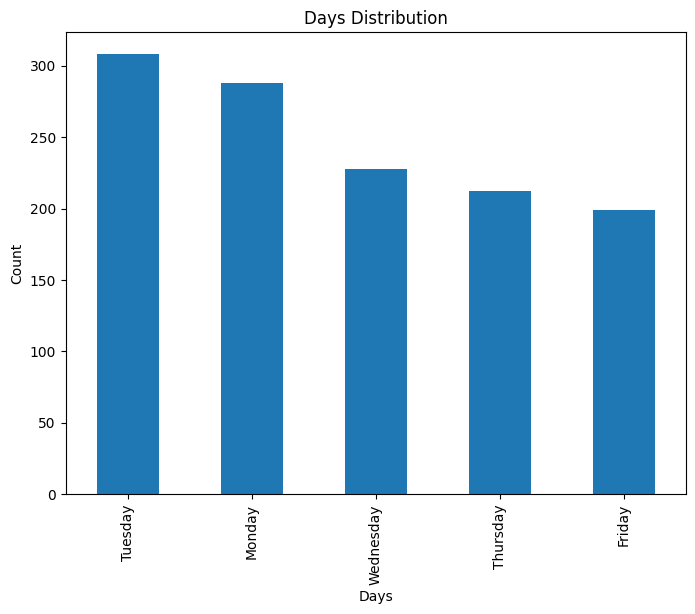

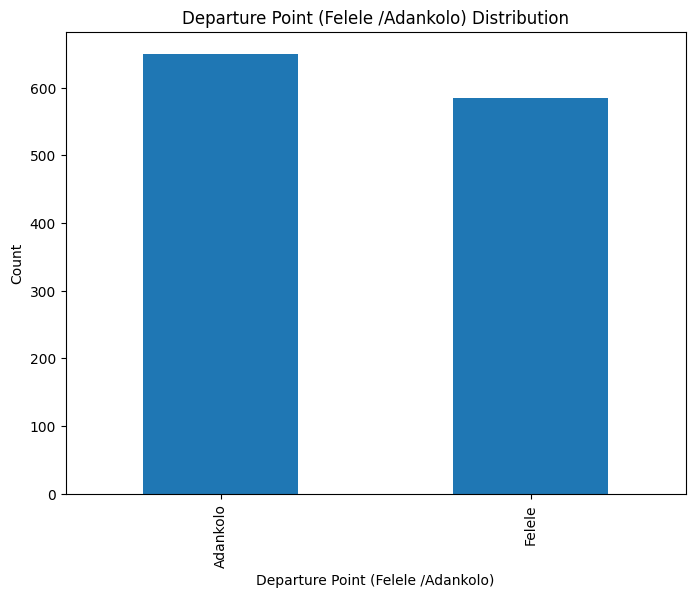

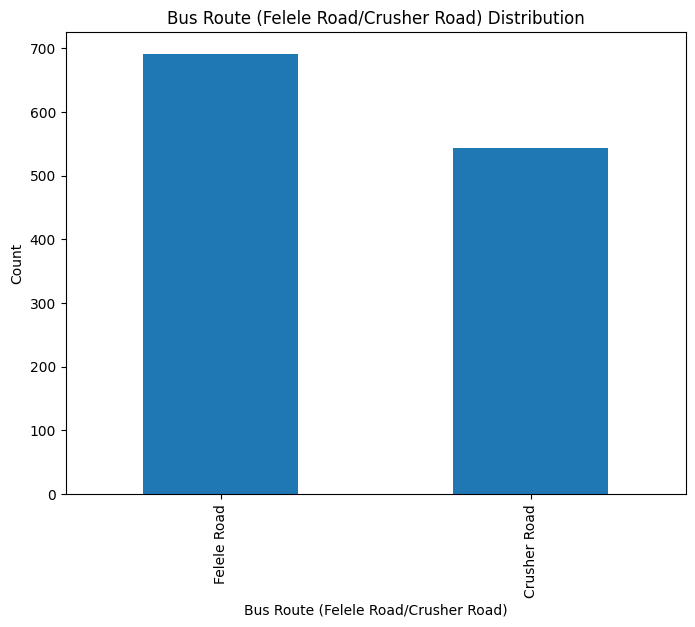

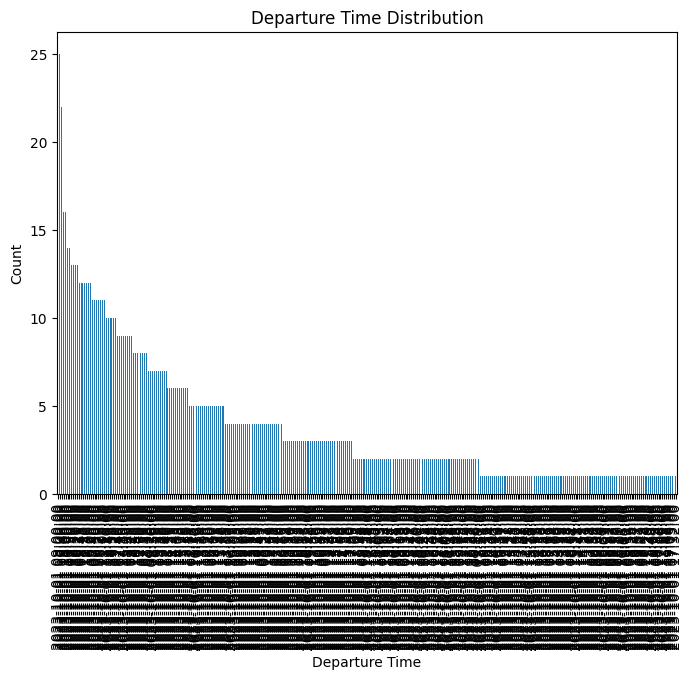

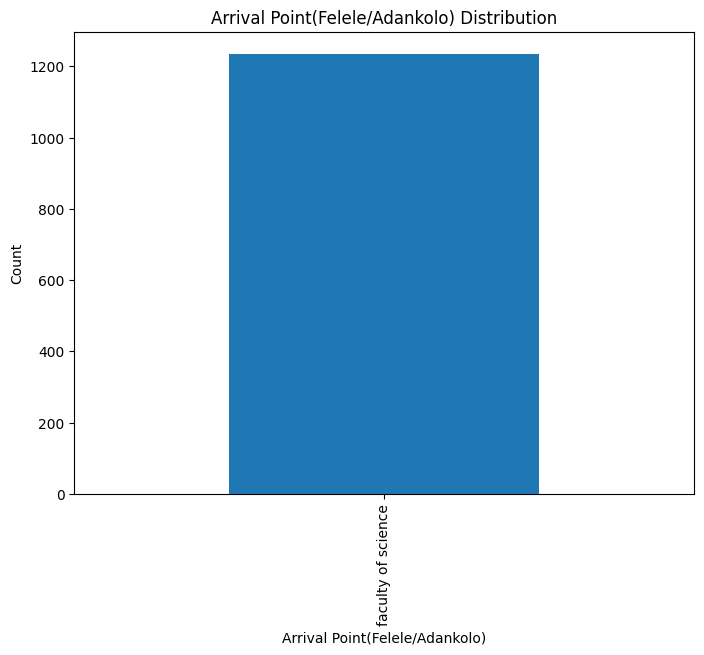

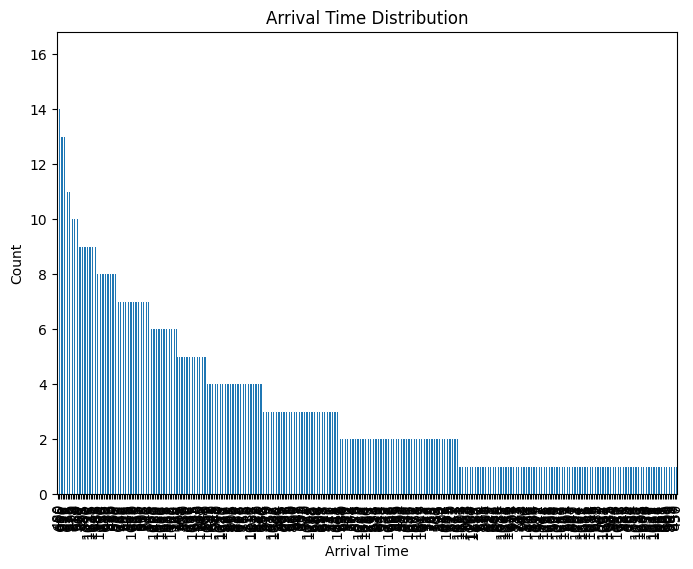

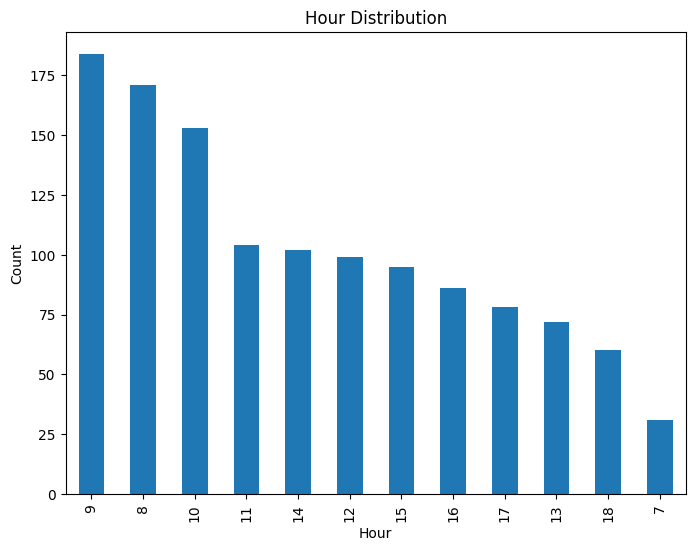

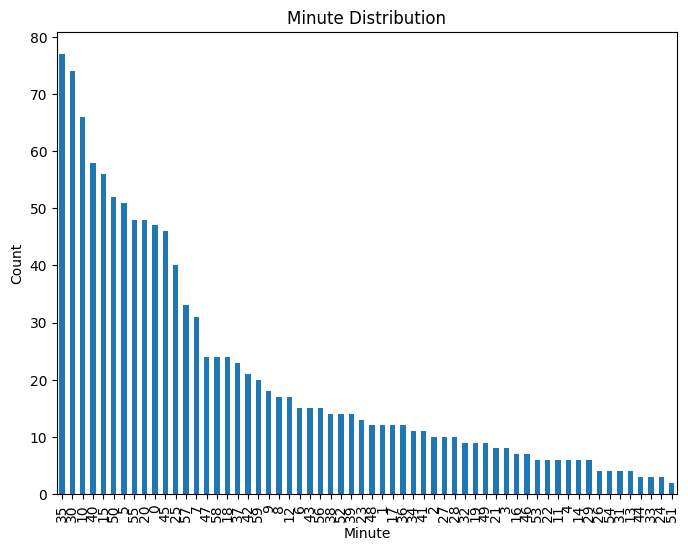

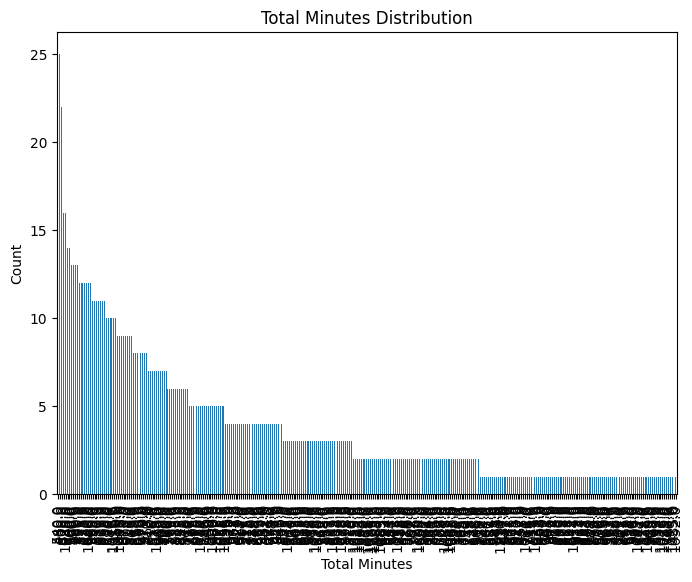

In [ ]:
columns = ['Days', 'Departure Point (Felele /Adankolo)',
       'Bus Route (Felele Road/Crusher Road)', 'Departure Time',
       'Arrival Point(Felele/Adankolo)', 'Arrival Time', 'Hour', 'Minute',
       'Total Minutes']

for column in columns:
    plt.figure(figsize=(8, 6))
    dataset[column].value_counts().plot(kind='bar')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [ ]:
categorical_columns = ['Days','Departure Point (Felele /Adankolo)',
       'Bus Route (Felele Road/Crusher Road)', 'Arrival Point(Felele/Adankolo)']

In [ ]:
# Preprocess categorical variables using one-hot encoding or other methods

X = pd.get_dummies(dataset.drop([ 'Departure Time', 'Hour', 'Minute', 'Total Minutes'], axis=1), columns=categorical_columns)
y = dataset['Total Minutes']

In [ ]:
mean_values = y.mean()

# Replace NaN values with the mean
y = y.fillna(mean_values)

In [ ]:
X

,Arrival Time,Days_Friday,Days_Monday,Days_Thursday,Days_Tuesday,Days_Wednesday,Departure Point (Felele /Adankolo)_Adankolo,Departure Point (Felele /Adankolo)_Felele,Bus Route (Felele Road/Crusher Road)_Crusher Road,Bus Route (Felele Road/Crusher Road)_Felele Road,Arrival Point(Felele/Adankolo)_faculty of science
0,485,0,1,0,0,0,0,1,0,1,1
1,490,0,1,0,0,0,0,1,0,1,1
2,498,0,1,0,0,0,0,1,0,1,1
3,518,0,1,0,0,0,1,0,1,0,1
4,519,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1230,1010,1,0,0,0,0,1,0,1,0,1
1231,1050,1,0,0,0,0,1,0,1,0,1
1232,1060,1,0,0,0,0,0,1,0,1,1
1233,1066,1,0,0,0,0,0,1,0,1,1


In [ ]:
y

0        470.0
1        474.0
2        476.0
3        480.0
4        483.0
         ...  
1230     980.0
1231    1021.0
1232    1052.0
1233    1059.0
1234    1070.0
Name: Total Minutes, Length: 1235, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [ ]:
# Initialize and train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the arrival time
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse =math.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error (MSE): 43.12
Root Mean Squared Error (RMSE): 6.57


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 4.00


In [ ]:

r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r_squared:.2f}")

R-squared (R²): 1.00


In [ ]:
# Feature Scaling
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

# Initialize and train an SVR model
svr_regressor = SVR(kernel='rbf')  # You can choose different kernels based on your problem
svr_regressor.fit(X_train_scaled, y_train)

# Predict the arrival time
y_pred = svr_regressor.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r_squared:.2f}")

Mean Squared Error (MSE): 27046.40
Root Mean Squared Error (RMSE): 164.46
Mean Absolute Error (MAE): 139.81
R-squared (R²): 0.27


In [ ]:
# Initialize and train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)  # You can adjust other hyperparameters
dt_regressor.fit(X_train, y_train)

# Predict the arrival time
y_pred = dt_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r_squared:.2f}")

Mean Squared Error (MSE): 95.01
Root Mean Squared Error (RMSE): 9.75
Mean Absolute Error (MAE): 3.62
R-squared (R²): 1.00


In [ ]:
# Initialize and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust other hyperparameters
rf_regressor.fit(X_train, y_train)

# Predict the arrival time
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r_squared:.2f}")

Mean Squared Error (MSE): 55.57
Root Mean Squared Error (RMSE): 7.45
Mean Absolute Error (MAE): 3.83
R-squared (R²): 1.00


In [ ]:
# Feature Engineering: Add polynomial features
poly_reg = PolynomialFeatures(degree=2)  # You can adjust the degree
X_poly = poly_reg.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
plregressor = LinearRegression()
plregressor.fit(X_train, y_train)

# Predict the arrival time
y_predpl = plregressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predpl)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

mae = mean_absolute_error(y_test, y_predpl)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


r_squared = r2_score(y_test, y_predpl)
print(f"R-squared (R²): {r_squared:.2f}")

Mean Squared Error (MSE): 97.95
Root Mean Squared Error (RMSE): 9.90
Mean Absolute Error (MAE): 4.76
R-squared (R²): 1.00


In [ ]:

# Initialize a Gaussian Process Regressor with a Radial Basis Function (RBF) kernel
kernel = 1.0 * RBF(length_scale=1.0)
gp_regressor = GaussianProcessRegressor(kernel=kernel, random_state=42)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gaussian Process Regressor
gp_regressor.fit(X_train, y_train)

# Predict the arrival time
y_pred, y_std = gp_regressor.predict(X_test, return_std=True)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r_squared:.2f}")

Mean Squared Error (MSE): 111273.04
Root Mean Squared Error (RMSE): 333.58
Mean Absolute Error (MAE): 217.43
R-squared (R²): -2.01


In [ ]:
import joblib

# Perform one-hot encoding on your dataset
X = pd.get_dummies(dataset.drop([ 'Departure Time', 'Hour', 'Minute', 'Total Minutes'], axis=1), columns=categorical_columns)

# Extract the list of categorical columns and the column order
categorical_columns = dataset.drop([ 'Departure Time', 'Hour', 'Minute', 'Total Minutes'], axis=1).select_dtypes(include=['object']).columns.tolist()
column_order = X.columns.tolist()

# Create an encoding configuration dictionary
encoding_config = {
    'categorical_columns': categorical_columns,
    'column_order': column_order
}

In [ ]:
model_filename = 'arival_model.pkl'
with open(model_filename, 'wb') as model_file:
    joblib.dump(rf_regressor, model_file)

In [ ]:
import pickle

with open('he_model_rfe.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)

In [ ]:
# Save the encoding configuration dictionary as a .pkl file
with open('encoding_config.pkl', 'wb') as config_file:
    joblib.dump(encoding_config, config_file)

In [ ]:

# Load the encoding configuration
encoding_config = joblib.load('encoding_config.pkl')

random_forest_model = joblib.load('arival_model.pkl')

# Create a dictionary to hold the user input
user_input = {
    'Arrival Time':485,
    'Days':'Monday',
    'Departure Point (Felele /Adankolo)':'Felele ',
    'Bus Route (Felele Road/Crusher Road)':'Felele Road',
    'Arrival Point(Felele/Adankolo)':'faculty of science'
}



# Convert user input into a DataFrame
user_data = pd.DataFrame([user_input])

# Perform the same one-hot encoding on user input
X_new = pd.get_dummies(user_data, columns=encoding_config['categorical_columns'])
X_new = X_new.reindex(columns=encoding_config['column_order'], fill_value=0)

# Make predictions using the model
prediction = random_forest_model.predict(X_new)

print(f'Predicted Graduation Class: {prediction[0]}')


Predicted Graduation Class: 462.232619047619


In [ ]:
predicted_total_minutes = round(prediction[0])
print(predicted_total_minutes)

462


In [ ]:
# Assuming 'predicted_total_minutes' is the predicted time in minutes
predicted_total_minutes = round(prediction[0])

# Convert back to hours and minutes
predicted_hours = predicted_total_minutes // 60
predicted_minutes = predicted_total_minutes % 60

# Determine AM or PM
if predicted_hours >= 12:
    am_pm = 'PM'
    if predicted_hours > 12:
        predicted_hours -= 12
else:
    am_pm = 'AM'

# Construct the string in the original format
predicted_time_original_format = f'{predicted_hours:02d}:{predicted_minutes:02d} {am_pm}'

print(predicted_time_original_format)


07:42 AM
